# HCV data Data Set

**Abstract**:The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.
([UCI](https://archive.ics.uci.edu/ml/datasets/HCV+data))

##### Source:

Creators: Ralf Lichtinghagen, Frank Klawonn, Georg Hoffmann

Donor: Ralf Lichtinghagen: Institute of Clinical Chemistry; Medical University Hannover (MHH); Hannover, Germany; lichtinghagen.ralf '@' mh-hannover.de

Donor: Frank Klawonn; Helmholtz Centre for Infection Research; Braunschweig, Germany; frank.klawonn '@' helmholtz-hzi.de

Donor: Georg Hoffmann; Trillium GmbH; Grafrath, Germany; georg.hoffmann '@' trillium.de



##### Data Set Information:

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).


#### Attribute Information:

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.
1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

3) Age (in years)

4) Sex (f,m)

5) ALB

6) ALP

7) ALT

8) AST

9) BIL

10) CHE

11) CHOL

12) CREA

13) GGT

14) PROT



### Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

### Carregando Dados

In [2]:
df_hepatite = pd.read_csv('hcvdat0.csv')

### Visualizando os Dados

In [3]:
df_hepatite.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
filtro = df_hepatite['Category'] == '0s=suspect Blood Donor'
lista = df_hepatite[filtro].index.tolist()
lista

[533, 534, 535, 536, 537, 538, 539]

In [6]:
df_hepatite.drop(lista, axis=0, inplace=True)

In [71]:
df_hepatite.reset_index(drop=True, inplace=True)

In [72]:
df_hepatite.loc[:,["Category"]]=df_hepatite.loc[:,["Category"]].replace(
    {'0=Blood Donor': 0,
    '1=Hepatitis':1,
    '2=Fibrosis':2,
    '3=Cirrhosis':3},regex=True)

df_hepatite.loc[:,["Sex"]]=df_hepatite.loc[:,["Sex"]].replace(
    {'m':0,
    'f':1},regex=True)

In [73]:
df_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    int64  
 1   Age       608 non-null    int64  
 2   Sex       608 non-null    int64  
 3   ALB       607 non-null    float64
 4   ALP       590 non-null    float64
 5   ALT       607 non-null    float64
 6   AST       608 non-null    float64
 7   BIL       608 non-null    float64
 8   CHE       608 non-null    float64
 9   CHOL      598 non-null    float64
 10  CREA      608 non-null    float64
 11  GGT       608 non-null    float64
 12  PROT      607 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 61.9 KB


In [17]:
#df_hepatite.drop('Unnamed: 0', axis=1, inplace=True)

In [74]:
df_hepatite.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,608.000000,608.000000,608.000000,607.000000,590.000000,607.000000,608.000000,608.000000,608.000000,598.000000,608.000000,608.000000,607.000000
mean,0.256579,47.291118,0.389803,41.818781,67.821017,27.601318,34.369408,11.474013,8.204885,5.378829,81.513158,38.243914,72.253213
std,0.746186,9.992705,0.488107,5.406717,25.274423,21.227539,32.622442,19.770558,2.168400,1.119394,49.720652,51.953220,4.932252
min,0.000000,19.000000,0.000000,20.000000,11.300000,0.900000,12.000000,1.800000,1.420000,1.430000,8.000000,4.500000,51.000000
25%,0.000000,39.000000,0.000000,39.000000,52.500000,16.400000,21.600000,5.300000,6.950000,4.620000,68.000000,15.700000,69.450000
50%,0.000000,47.000000,0.000000,42.000000,66.000000,23.000000,25.850000,7.300000,8.270000,5.300000,77.000000,23.250000,72.200000
75%,0.000000,54.000000,1.000000,45.250000,79.525000,32.750000,32.800000,11.300000,9.585000,6.075000,88.000000,39.200000,75.400000
max,3.000000,77.000000,1.000000,82.200000,416.600000,258.000000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [75]:
df_hepatite.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [76]:
df_hepatite[['Category']].value_counts()

Category
0           533
3            30
1            24
2            21
dtype: int64

### Profile Report

In [11]:
profile = ProfileReport(df_hepatite, title="Hepatitis C Profile Report")
profile.to_file('hepatitis_report_2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Analisando Histograma dos Dados

In [11]:
%matplotlib inline

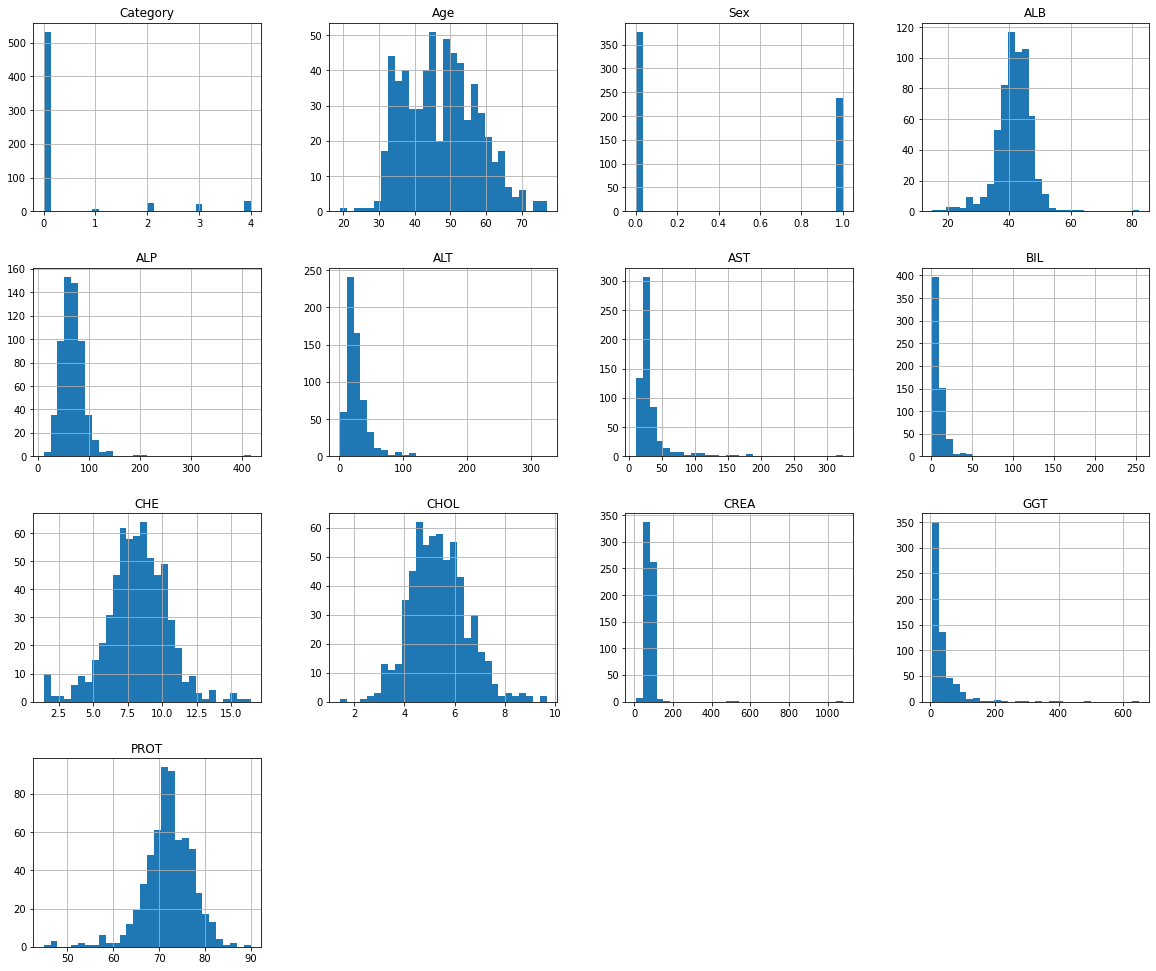

In [12]:
df_hepatite.hist(bins=30, figsize=(20,17))
plt.show()

In [13]:
#correlações maiores que 0.1 ou diferetes de 1
corr_df = df_hepatite.corr()
corr_df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.106341,-0.060657,-0.288252,0.032323,0.106574,0.648341,0.473006,-0.329472,-0.308071,0.182040,0.471164,0.007230
Age,0.106341,1.000000,0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,-0.060657,0.024544,1.000000,-0.146140,0.019825,-0.161868,-0.130891,-0.111177,-0.169111,0.030208,-0.159589,-0.133276,-0.051277
ALB,-0.288252,-0.197498,-0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.032323,0.173340,0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,0.106574,-0.006021,-0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.648341,0.088666,-0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.473006,0.032492,-0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.329472,-0.075093,-0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,-0.308071,0.125641,0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071


In [77]:
#cópia do dataset
df = df_hepatite.copy()

In [78]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

### Seperação da váriável target do dataset

In [79]:
X = df.drop('Category', axis=1)
y = df['Category']

In [80]:
X.shape

(608, 12)

In [81]:
y.shape

(608,)

## Pipeline dos Dados

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [83]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())])

In [84]:
#X_train_num_tr = num_pipeline.fit_transform(X_train_num)

**Categoricos**

In [85]:
# lista com os atributos categóricos
atributos_cat = ['Sex']
# lista com os atributos númericos
atributos_num = list(X.drop(atributos_cat, axis=1))

In [86]:
## Criando pipeline para atributos categoricos
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, atributos_num),
        ("cat", OneHotEncoder(), atributos_cat),
    ])

X_pipe = full_pipeline.fit_transform(X)

In [87]:
X_pipe.shape

(608, 13)

In [88]:
y.shape

(608,)

In [89]:
name_col = list(df.columns)
name_col = name_col[1:]
name_col.append('M')
name_col.append('F')
name_col

['Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT',
 'M',
 'F']

In [90]:
X = pd.DataFrame(X_pipe)

In [91]:
X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [92]:
X.rename(columns={0: "Age", 1: 'ALB', 2: 'ALP', 3: 'ALT', 4: 'AST', 
                  5: 'BIL', 6: 'CHE', 7: 'CHOL', 8: 'CREA', 9: 'GGT', 10: 'PROT', 11: 'M', 12:'F'}, inplace=True)

In [93]:
X.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,M,F
0,-1.531488,-0.614892,-0.613672,-0.938676,-0.376413,-0.201172,-0.588422,-1.935993,0.492894,-0.503635,-0.660649,1.0,0.0
1,-1.531488,-0.614892,0.101811,-0.452676,-0.296648,-0.383411,1.368547,-0.520644,-0.151232,-0.436211,0.862461,1.0,0.0
2,-1.531488,0.941291,0.278672,0.406081,0.559296,-0.272043,0.293137,-0.160045,0.090315,-0.097166,1.431089,1.0,0.0
3,-1.531488,0.255829,-0.633770,0.141848,-0.361073,0.375918,-0.403803,-0.574734,-0.030458,-0.085607,0.699996,1.0,0.0
4,-1.531488,-0.485210,0.254555,0.236217,-0.293580,-0.094866,0.436217,-0.953362,-0.110974,-0.160737,-0.721574,1.0,0.0


In [94]:
y.dtype

dtype('int64')

In [95]:
df_final = pd.concat([X, y], axis=1)

In [96]:
df_final.isnull().sum()

Age         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
M           0
F           0
Category    0
dtype: int64

In [97]:
df_final['Category'] = df_final['Category'].astype('category')

In [98]:
df_final.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,M,F,Category
0,-1.531488,-0.614892,-0.613672,-0.938676,-0.376413,-0.201172,-0.588422,-1.935993,0.492894,-0.503635,-0.660649,1.0,0.0,0
1,-1.531488,-0.614892,0.101811,-0.452676,-0.296648,-0.383411,1.368547,-0.520644,-0.151232,-0.436211,0.862461,1.0,0.0,0
2,-1.531488,0.941291,0.278672,0.406081,0.559296,-0.272043,0.293137,-0.160045,0.090315,-0.097166,1.431089,1.0,0.0,0
3,-1.531488,0.255829,-0.633770,0.141848,-0.361073,0.375918,-0.403803,-0.574734,-0.030458,-0.085607,0.699996,1.0,0.0,0
4,-1.531488,-0.485210,0.254555,0.236217,-0.293580,-0.094866,0.436217,-0.953362,-0.110974,-0.160737,-0.721574,1.0,0.0,0


In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       608 non-null    float64 
 1   ALB       608 non-null    float64 
 2   ALP       608 non-null    float64 
 3   ALT       608 non-null    float64 
 4   AST       608 non-null    float64 
 5   BIL       608 non-null    float64 
 6   CHE       608 non-null    float64 
 7   CHOL      608 non-null    float64 
 8   CREA      608 non-null    float64 
 9   GGT       608 non-null    float64 
 10  PROT      608 non-null    float64 
 11  M         608 non-null    float64 
 12  F         608 non-null    float64 
 13  Category  608 non-null    category
dtypes: category(1), float64(13)
memory usage: 62.7 KB


#### Criando um novo csv limpo

In [100]:
df_final.to_csv('HCV-Data.csv')